In [1]:
import sys
# Get the absolute path of the project root directory
project_root = '/glade/work/wchapman/WH_RMM_forecasting/WH_RMM_forecasting' 
# Add the project root directory to sys.path
sys.path.append(project_root)

import sys
import yaml
import os
import glob
import xarray as xr
import numpy as np
import eofs.standard as Eof_st
from eofs.multivariate.standard import MultivariateEof
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import copy
import re
from datetime import datetime
import utils.WHtools as whtools 
import utils.ProcessForecasts as ProFo 
import utils.ProcessOBS as ProObs
import importlib
importlib.reload(ProFo)
importlib.reload(ProObs)

In [2]:
# Define the path to the YAML file
yaml_file_path = './settings.yaml'
MJO_obs = ProObs.MJOobsProcessor(yaml_file_path)
#TODO... it feels like I can remove ""
OBS_DS, eof_list, pcs, MJO_fobs, eof_dict = MJO_obs.make_observed_MJO()

Number of forecast files to process: 1265
expanding coords to include ensemble
ensemble dimension length: 11
there are 46 forecast lead days in these files
Initial look at forecast files passes the first test
opening user defined obs file
-------------------------------------------------
note: Observed LONS must be from 0->360 and not -180->180
-------------------------------------------------
 ----- Taking the EOF ----- 
...done making observed EOFS, check ./output_plots/*.png for verification metrics...
...attaching the BOM index for verification...
...saved OLR obs file...


In [15]:
MJO_for = ProFo.MJOforecaster(yaml_file_path,MJO_obs.eof_dict,MJO_obs.MJO_fobs)
DS_CESM_for,OLR_cesm_anom_filterd,U200_cesm_anom_filterd,U850_cesm_anom_filterd = MJO_for.create_forecasts()

Number of forecast files to process: 1265
expanding coords to include ensemble
ensemble dimension length: 11
there are 46 forecast lead days in these files
Initial look at forecast files passes the first test
Using the forecast dependent climatology. Make sure you have generated it using ./Preprocessing_Scripts/*.ipynb.
/glade/scratch/wchapman/MJO_S2S_CESM2/RMM_forecast/ERA5//MJO_Forecast_Init_01apr2002.nc
The above forecast file already exists... Im skipping it... erase it if you want to make it again
/glade/scratch/wchapman/MJO_S2S_CESM2/RMM_forecast/ERA5//MJO_Forecast_Init_01apr2013.nc
The above forecast file already exists... Im skipping it... erase it if you want to make it again
/glade/scratch/wchapman/MJO_S2S_CESM2/RMM_forecast/ERA5//MJO_Forecast_Init_01apr2019.nc
The above forecast file already exists... Im skipping it... erase it if you want to make it again
/glade/scratch/wchapman/MJO_S2S_CESM2/RMM_forecast/ERA5//MJO_Forecast_Init_01aug2005.nc
The above forecast file already 

In [23]:
DS = xr.open_dataset('/glade/scratch/wchapman/archive/f.e21.FHIST.f09_f09_mg17_nudge_it_12hr_avg/atm/hist/f.e21.FHIST.f09_f09_mg17_nudge_it_12hr_avg.cam.h1.1979-01-01-55800.nc')

## TODO
Read the docs

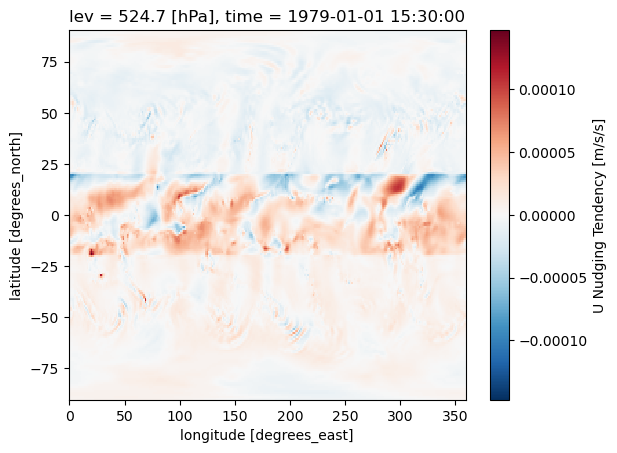

In [29]:
DS.sel(lev=500,method='nearest')['Nudge_U'].squeeze().plot()